In [2]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns

# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "Lb6AB1z5OSNzExUKwDbv8fLwB"
consumer_secret = "TxseIbLpQiEjLspr2Y1j9FnnqtYu8ROTwgpoGalbTPpoSWwdHW"
access_token = "937013938360745986-OcSJyTBTIuQfv8GSbfmGcETga4nTUo2"
access_token_secret = "OVsfEr5C81Zui81nnuMOE0ygfZC6Ba3czLD2CPbaLF3NF"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [ ]:
#In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various 
#news oulets, and to present your findings visually.

#Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following 
#news organizations: __BBC (@BBC), CBS (@CBSNews), CNN (@CNN), Fox (@FoxNews), and New York times__ (@nytimes).

In [8]:
# Target User Account
#target_user = "@BBC"

# Target Accounts
news_sources = ["@BBC", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"]

# Variables for holding sentiments
sentiments = []

# Loop through the 5 different news sources
for target_user in news_sources:

    # Reset the counter at 1
    counter = 1
    
    print(target_user)
    
    for item in tweepy.Cursor(api.user_timeline, id=target_user).items(100):
        # page is a list of statuses

        tweet = json.dumps(item._json, indent=3)
        tweet = json.loads(tweet)
        text = tweet['text']

        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(text)["compound"]
        pos = analyzer.polarity_scores(text)["pos"]
        neu = analyzer.polarity_scores(text)["neu"]
        neg = analyzer.polarity_scores(text)["neg"]

        # Add sentiments for each tweet into an array
        sentiments.append({"Source": target_user,
                           "Date": tweet["created_at"],
                           "Tweets Ago": counter,
                           "Compound": compound,
                           "Positive": pos,
                           "Neutral": neu,
                           "Negative": neg})

        #Increase the counter
        counter += 1
    
# Convert sentiments to DataFrame
sentiments_df = pd.DataFrame.from_dict(sentiments)

print(sentiments_df.head())
print(sentiments_df.tail())

@BBC
@CBSNews
@CNN
@FoxNews
@nytimes
   Compound                            Date  Negative  Neutral  Positive  \
0   -0.5719  Tue Dec 12 20:30:05 +0000 2017     0.300    0.558     0.142   
1    0.0000  Tue Dec 12 20:00:09 +0000 2017     0.000    1.000     0.000   
2    0.0000  Tue Dec 12 19:30:05 +0000 2017     0.000    1.000     0.000   
3   -0.0062  Tue Dec 12 19:19:59 +0000 2017     0.113    0.775     0.112   
4    0.4939  Tue Dec 12 19:19:47 +0000 2017     0.000    0.878     0.122   

  Source  Tweets Ago  
0   @BBC           1  
1   @BBC           2  
2   @BBC           3  
3   @BBC           4  
4   @BBC           5  
     Compound                            Date  Negative  Neutral  Positive  \
495    0.4215  Tue Dec 12 10:44:05 +0000 2017       0.0    0.787     0.213   
496    0.2263  Tue Dec 12 10:30:13 +0000 2017       0.0    0.826     0.174   
497    0.0000  Tue Dec 12 10:15:05 +0000 2017       0.0    1.000     0.000   
498    0.0000  Tue Dec 12 10:00:09 +0000 2017       0.0 

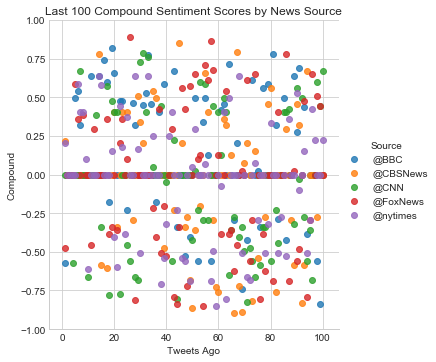

In [10]:
#Create scatterplot of compound sentiment over last 100 tweets
sns.set_style("whitegrid")
sns.lmplot(x = "Tweets Ago", y = "Compound", data = sentiments_df, 
           fit_reg = False, hue = "Source", legend = True)
plt.title("Last 100 Compound Sentiment Scores by News Source")
plt.show()

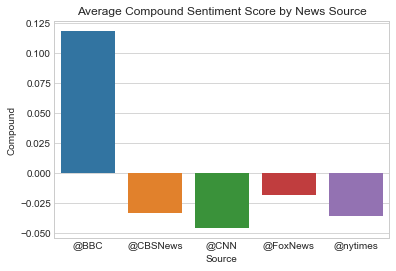

     Source  Compound
0      @BBC  0.118858
1  @CBSNews -0.033072
2      @CNN -0.045094
3  @FoxNews -0.018080
4  @nytimes -0.035344
The overall average sentiment score for the last 100 tweets for each news source is: -0.002546


In [11]:
#Create a data frame with the mean of the Compound sentiment
compound_avg = pd.DataFrame(sentiments_df.groupby("Source").mean()["Compound"], index = None).reset_index()

#Create the barplot
sns.barplot(x = "Source", y = "Compound", data = sentiments_df, ci = 0)
plt.title("Average Compound Sentiment Score by News Source")
plt.show()

print(compound_avg)
print("The overall average sentiment score for the last 100 tweets for each news source is: %s" 
      % round(sentiments_df["Compound"].mean(),6))

In [ ]:
# 3 Observable Trends

#1) The most common individual compound sentiment score appears to be right around 0 - this indicates that most tweets from
#   the different news sources are mostly neutral.

#2) Only BBC  has an average compound score that is positive, which indicates that the news has been a bit more positive
#   in the UK than it has been in America recently.

#3) The average compound sentiment score is slightly negative; without BBC bringing that score up, the average compound 
#   sentiment score would be -0.0328975.  Although that score is negative, it is still close to 0, indicating that the news
#   scores are still neutral on the whole.
